In [2]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
df.shape

(50000, 2)

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

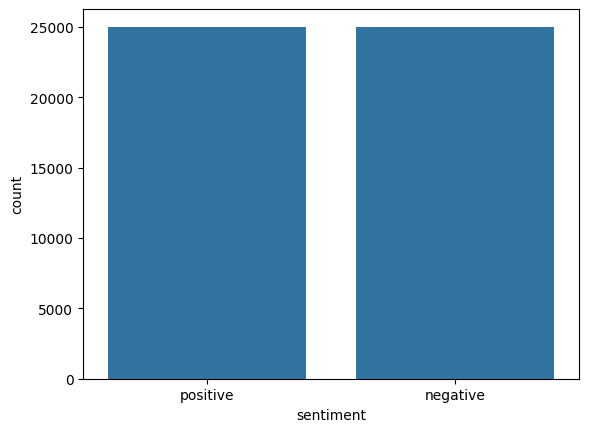

In [5]:
# Checking for skewness in the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['sentiment'])

Data is not skewed.

# Data Preprocessing

In [6]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords

def remove_tage(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'', text)

def preprocess_text(text):
  sentence = remove_tage(text)
  sentence = re.sub('[^a-zA-Z]' , ' ' , sentence)
  sentence = sentence.lower()
  sentence = re.sub(r'\s+[a-zA-Z]\s+' , ' ' , sentence)     # Removing single characters
  sentence = re.sub(r'\s+' , ' ' , sentence)      # removing multiple spaces
  sentence = [word for word in sentence.split() if word not in set(stopwords.words('english'))]

  return sentence

In [8]:
X = list()

for review in df['review']:
  X.append(preprocess_text(review))

X

[['one',
  'reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'hooked',
  'right',
  'exactly',
  'happened',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'many',
  'aryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'never',
  'far',
  'away',
  'would',

In [9]:
import numpy as np


y = df['sentiment']
y = np.array(list(map(lambda x:1 if x=='positive' else 0 , y)))

In [10]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=10)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_test

[[3,
  29,
  4034,
  2433,
  28,
  1335,
  2441,
  2426,
  3978,
  496,
  103,
  10,
  57,
  482,
  38006,
  34542,
  3689,
  13,
  3656,
  3281,
  169,
  22,
  1163,
  12,
  233,
  5738,
  42,
  195,
  2408,
  538,
  9566,
  9580,
  1334,
  3371,
  6874,
  5050,
  1327,
  15266,
  20734,
  877,
  42,
  31,
  10855,
  151,
  955,
  2904,
  3396,
  39,
  480,
  29,
  832,
  3,
  6,
  104,
  1102,
  1196,
  1327,
  24,
  476,
  43379,
  832,
  1582,
  129,
  88,
  538,
  476,
  323,
  105,
  2116,
  868,
  116,
  3,
  8739,
  2408,
  100,
  1696,
  115,
  41,
  37,
  471,
  1074,
  149,
  252,
  31,
  38,
  443,
  129,
  2596,
  2,
  716,
  6063,
  25201,
  68,
  2408,
  147],
 [2275,
  3287,
  11171,
  1371,
  62,
  7291,
  20,
  1,
  124,
  154,
  71,
  1133,
  66,
  2167,
  474,
  196,
  179,
  30061,
  4558,
  4838,
  785,
  1117,
  46,
  10,
  10,
  323,
  105,
  66,
  975,
  202,
  3,
  46,
  231,
  12955,
  235,
  4125,
  46,
  6471,
  28,
  407,
  16,
  21,
  630,
  925,
  623],


In [12]:
vocab_length = len(tokenizer.word_index)+1
vocab_length

92034

In [13]:
max(len(review) for review in X_train)

1401

In [14]:
# Padding to make length of all review equal

from tensorflow.keras.preprocessing.sequence import pad_sequences

length = 200
X_train = pad_sequences(X_train , padding='post' , maxlen=length)
X_test = pad_sequences(X_test , padding='post' , maxlen=length)
X_train.shape , X_test.shape

((40000, 200), (10000, 200))

# Training Simple NN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , Flatten , Dense

model = Sequential()
model.add(Embedding(vocab_length , 100 , input_length=length))
model.add(Flatten())
model.add(Dense(1 , activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.1) , loss='binary_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_history = model.fit(X_train , y_train , batch_size=128 , epochs=20 , validation_split=0.2 , verbose=1)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6556 - loss: 114.8959 - val_accuracy: 0.7561 - val_loss: 20.4324
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8872 - loss: 9.7671 - val_accuracy: 0.8173 - val_loss: 36.2084
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9394 - loss: 9.3469 - val_accuracy: 0.8095 - val_loss: 65.3030
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9662 - loss: 6.8674 - val_accuracy: 0.8261 - val_loss: 85.3639
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9756 - loss: 6.0585 - val_accuracy: 0.8196 - val_loss: 114.2306
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9806 - loss: 5.4163 - val_accuracy: 0.8246 - val_loss: 146.6764
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9837 - loss: 5.0809 - val_accuracy: 0.8051 - val_loss: 195.5372
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9854 - loss: 5.5038 - val

In [18]:
score = model.evaluate(X_test , y_test , verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8400 - loss: 629.8870


In [19]:
print(f'Test Score : {score[0]}')
print(f'Test Accuracy : {score[1]}')

Test Score : 644.083740234375
Test Accuracy : 0.8338000178337097


In [20]:
model_history.history

{'accuracy': [0.7279062271118164,
  0.8911250233650208,
  0.9378437399864197,
  0.9645312428474426,
  0.9733750224113464,
  0.9782812595367432,
  0.9815000295639038,
  0.9831874966621399,
  0.9856562614440918,
  0.9878437519073486,
  0.989187479019165,
  0.9901562333106995,
  0.9916562438011169,
  0.9919062256813049,
  0.9918437600135803,
  0.991812527179718,
  0.9934687614440918,
  0.9948437213897705,
  0.9941562414169312,
  0.9934375286102295],
 'loss': [43.60040283203125,
  11.77519416809082,
  11.019575119018555,
  7.932977199554443,
  7.013765811920166,
  6.683483600616455,
  6.9139723777771,
  7.457906246185303,
  6.643425941467285,
  6.216829776763916,
  6.246148586273193,
  6.434937000274658,
  5.819759845733643,
  5.52060079574585,
  6.925928592681885,
  7.480856895446777,
  6.372933387756348,
  4.309190273284912,
  5.2743048667907715,
  6.2432684898376465],
 'val_accuracy': [0.7561249732971191,
  0.8172500133514404,
  0.809499979019165,
  0.8261250257492065,
  0.8196250200271

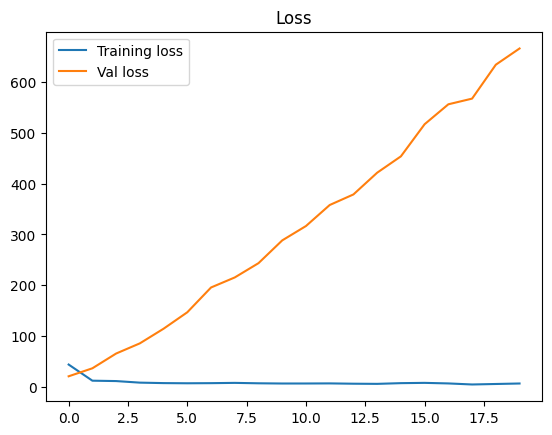

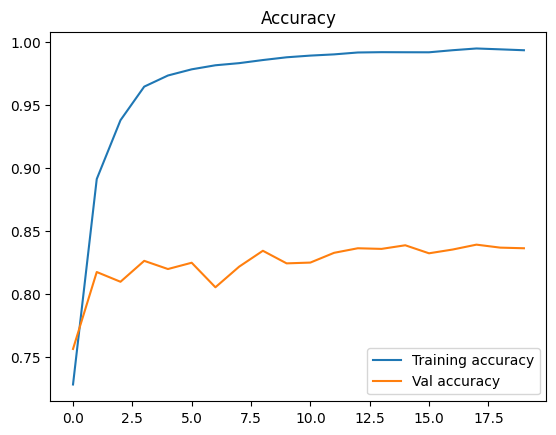

In [21]:
# Model Performance Chart

plt.plot(model_history.history['loss'] , label='Training loss')
plt.plot(model_history.history['val_loss'] , label='Val loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'] , label='Training accuracy')
plt.plot(model_history.history['val_accuracy'] , label='Val accuracy')
plt.title('Accuracy')
plt.legend()

# CNN Model

In [22]:
from tensorflow.keras.layers import Conv1D , GlobalMaxPooling1D
cnn_model = Sequential()
cnn_model.add(Embedding(vocab_length , 100 , input_length=length))
cnn_model.add(Conv1D(128 , 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(10 , activation='relu'))
cnn_model.add(Dense(1 , activation='sigmoid'))

In [23]:
cnn_model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [24]:
cnn_history = cnn_model.fit(X_train , y_train , batch_size=128 , epochs=20 , validation_split=0.2 , verbose=1)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7242 - loss: 0.5625 - val_accuracy: 0.8704 - val_loss: 0.3061
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9280 - loss: 0.1947 - val_accuracy: 0.8826 - val_loss: 0.2914
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9858 - loss: 0.0651 - val_accuracy: 0.8773 - val_loss: 0.3459
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9980 - loss: 0.0146 - val_accuracy: 0.8774 - val_loss: 0.4151
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9999 - loss: 0.0025 - val_accuracy: 0.8756 - val_loss: 0.4584
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 9.1414e-04 - val_accuracy: 0.8752 - val_loss: 0.4908
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 5.2584e-04 - val_accuracy: 0.8745 - val_loss: 0.5156
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 3.3631e-04 - val

In [25]:
score = cnn_model.evaluate(X_test ,  y_test , verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8724 - loss: 0.6677


In [26]:
print(f'Test Score : {score[0]}')
print(f'Test Accuracy : {score[1]}')

Test Score : 0.6832840442657471
Test Accuracy : 0.8702999949455261


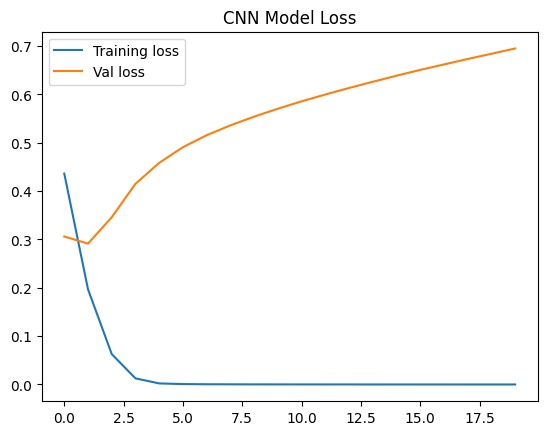

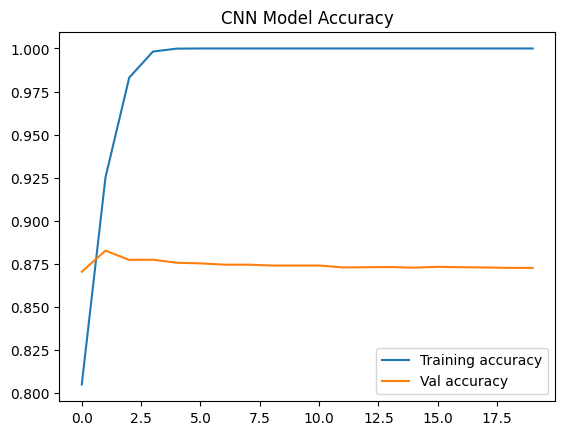

In [27]:
# Model performance

plt.plot(cnn_history.history['loss'] , label='Training loss')
plt.plot(cnn_history.history['val_loss'] , label='Val loss')
plt.title('CNN Model Loss')
plt.legend()
plt.show()

plt.plot(cnn_history.history['accuracy'] , label='Training accuracy')
plt.plot(cnn_history.history['val_accuracy'] , label='Val accuracy')
plt.title('CNN Model Accuracy')
plt.legend()

# LSTM Model

In [28]:
from tensorflow.keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_length , 100 , input_length=length))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(1 , activation='sigmoid'))

In [29]:
lstm_model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [30]:
lstm_history = lstm_model.fit(X_train , y_train , batch_size=128 , epochs=20 , validation_split=0.2 , verbose=1)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5036 - loss: 0.6932 - val_accuracy: 0.5116 - val_loss: 0.6907
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5371 - loss: 0.6739 - val_accuracy: 0.5464 - val_loss: 0.6601
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6164 - loss: 0.5922 - val_accuracy: 0.5428 - val_loss: 0.6665
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5839 - loss: 0.5974 - val_accuracy: 0.8112 - val_loss: 0.4780
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7682 - loss: 0.4908 - val_accuracy: 0.8495 - val_loss: 0.3826
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9180 - loss: 0.2272 - val_accuracy: 0.8767 - val_loss: 0.3260
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9629 - loss: 0.1159 - val_accuracy: 0.8795 - val_loss: 0.3559
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9836 - loss: 0.0605 - val_ac

In [31]:
score = lstm_model.evaluate(X_test , y_test , verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8733 - loss: 0.7086


In [32]:
print(f'Test Score : {score[0]}')
print(f'Test Accuracy : {score[1]}')

Test Score : 0.7301966547966003
Test Accuracy : 0.867900013923645


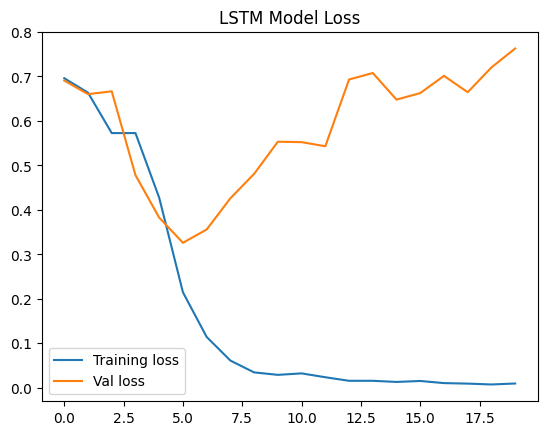

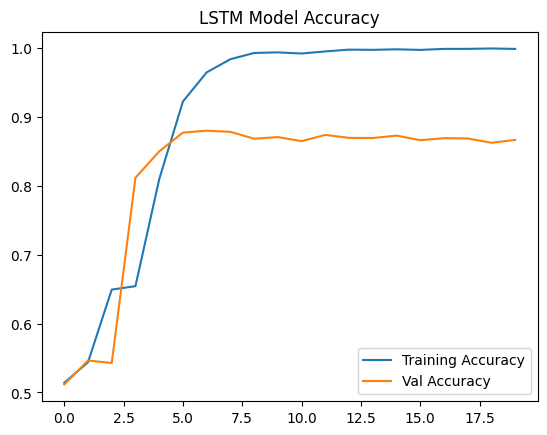

In [33]:
plt.plot(lstm_history.history['loss'] , label='Training loss')
plt.plot(lstm_history.history['val_loss'] , label='Val loss')
plt.title('LSTM Model Loss')
plt.legend()
plt.show()

plt.plot(lstm_history.history['accuracy'] , label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'] , label='Val Accuracy')
plt.title('LSTM Model Accuracy')
plt.legend()
plt.show()

In [42]:
def predict(review):
  review = preprocess_text(review)
  review = tokenizer.texts_to_sequences([review])
  review = pad_sequences(review , padding='post' , maxlen=length)
  prediction = lstm_model.predict(review)
  if prediction > 0.5:
    print('Positive')
  else:
    print('Negative')

review = 'I expected more from this film. It had some good moments but was overall disappointing.'
predict(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Positive


In [37]:
print(lstm_model.output_shape)  # Should be (None, 1)

(128, 1)


In [35]:
lstm_model.save('sentiment_lstm.h5')